In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import log2

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
plt.rcParams['figure.figsize'] = 11.7,8.27

In [1]:
acc = """
ternary/2024-05-09-21-55-48/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.05_dmax=0.05_dmaxep=0, 92.780
ternary/2024-05-09-18-22-14/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.05_dmaxep=100, 92.754
ternary/2024-05-09-21-16-55/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.2_dmaxep=100, 92.673
ternary/2024-05-09-18-56-35/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.1_dmaxep=100, 92.6471
ternary/2024-05-09-19-30-01/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.2_dmaxep=100, 92.6203
ternary/2024-05-09-20-43-42/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.1_dmaxep=100, 92.5936
ternary/2024-05-09-16-11-25/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.05_dmaxep=100, 92.4599
ternary/2024-05-09-20-10-33/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.05_dmaxep=100, 92.4599
ternary/2024-05-09-16-44-33/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.1_dmaxep=100, 92.3529
ternary/2024-05-09-22-31-38/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.1_dmax=0.1_dmaxep=0, 92.272
ternary/2024-05-09-23-07-44/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.2_dmax=0.2_dmaxep=0, 92.139
ternary/2024-05-09-17-17-44/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.2_dmaxep=100, 92.0053
"""

zero = """
ternary/2024-05-09-17-17-44/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.2_dmaxep=100, 86.8553
ternary/2024-05-09-23-07-44/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.2_dmax=0.2_dmaxep=0, 85.9874
ternary/2024-05-09-21-16-55/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.2_dmaxep=100, 85.5198
ternary/2024-05-09-19-30-01/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.2_dmaxep=100, 83.7087
ternary/2024-05-09-22-31-38/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.1_dmax=0.1_dmaxep=0, 71.6681
ternary/2024-05-09-20-43-42/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.1_dmaxep=100, 67.9245
ternary/2024-05-09-16-44-33/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.1_dmaxep=100, 67.3873
ternary/2024-05-09-18-56-35/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.1_dmaxep=100, 65.5206
ternary/2024-05-09-21-55-48/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.05_dmax=0.05_dmaxep=0, 57.0009
ternary/2024-05-09-16-11-25/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.05_dmaxep=100, 50.6567
ternary/2024-05-09-20-10-33/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.05_dmaxep=100, 46.6761
ternary/2024-05-09-18-22-14/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.05_dmaxep=100, 46.6049
"""

In [10]:
def parse(text: str):
    res = {}
    for li in text.split('\n'):
        if len(li) == 0: continue
        idd, value = li.split(',')
        res[idd.strip()] = float(value.strip())
    return res

acc_data = parse(acc)
zero_data = parse(zero)

diff_ids = set(acc_data.keys()).symmetric_difference(set(zero_data.keys()))
assert(len(diff_ids) == 0)

In [16]:
acc_col = pd.Series(acc_data)
zero_col = pd.Series(zero_data)
df = pd.DataFrame({"acc": acc_col, "zero": zero_col}).reset_index(drop=False)
df

,index,acc,zero
0,ternary/2024-05-09-16-11-25/bs=200_lr=0.01_m=0...,92.4599,50.6567
1,ternary/2024-05-09-16-44-33/bs=200_lr=0.01_m=0...,92.3529,67.3873
2,ternary/2024-05-09-17-17-44/bs=200_lr=0.01_m=0...,92.0053,86.8553
3,ternary/2024-05-09-18-22-14/bs=200_lr=0.01_m=0...,92.7540,46.6049
4,ternary/2024-05-09-18-56-35/bs=200_lr=0.01_m=0...,92.6471,65.5206
5,ternary/2024-05-09-19-30-01/bs=200_lr=0.01_m=0...,92.6203,83.7087
6,ternary/2024-05-09-20-10-33/bs=200_lr=0.01_m=0...,92.4599,46.6761
7,ternary/2024-05-09-20-43-42/bs=200_lr=0.01_m=0...,92.5936,67.9245
8,ternary/2024-05-09-21-16-55/bs=200_lr=0.01_m=0...,92.6730,85.5198
9,ternary/2024-05-09-21-55-48/bs=200_lr=0.01_m=0...,92.7800,57.0009


In [21]:
def get_hparams(x: str) -> str:
    x = x.strip().split('/')[-1]
    hparams = x.split('_')
    hparams = [y.split('=') for y in hparams]
    return { k: v for k, v in hparams }

df['dreg'] = df['index'].map(lambda x: get_hparams(x)['dreg'])
df['dmax'] = df['index'].map(lambda x: get_hparams(x)['dmax'])
df

,index,acc,zero,dreg,dmax
0,ternary/2024-05-09-16-11-25/bs=200_lr=0.01_m=0...,92.4599,50.6567,linear,0.05
1,ternary/2024-05-09-16-44-33/bs=200_lr=0.01_m=0...,92.3529,67.3873,linear,0.1
2,ternary/2024-05-09-17-17-44/bs=200_lr=0.01_m=0...,92.0053,86.8553,linear,0.2
3,ternary/2024-05-09-18-22-14/bs=200_lr=0.01_m=0...,92.7540,46.6049,square,0.05
4,ternary/2024-05-09-18-56-35/bs=200_lr=0.01_m=0...,92.6471,65.5206,square,0.1
5,ternary/2024-05-09-19-30-01/bs=200_lr=0.01_m=0...,92.6203,83.7087,square,0.2
6,ternary/2024-05-09-20-10-33/bs=200_lr=0.01_m=0...,92.4599,46.6761,sqrt,0.05
7,ternary/2024-05-09-20-43-42/bs=200_lr=0.01_m=0...,92.5936,67.9245,sqrt,0.1
8,ternary/2024-05-09-21-16-55/bs=200_lr=0.01_m=0...,92.6730,85.5198,sqrt,0.2
9,ternary/2024-05-09-21-55-48/bs=200_lr=0.01_m=0...,92.7800,57.0009,const,0.05


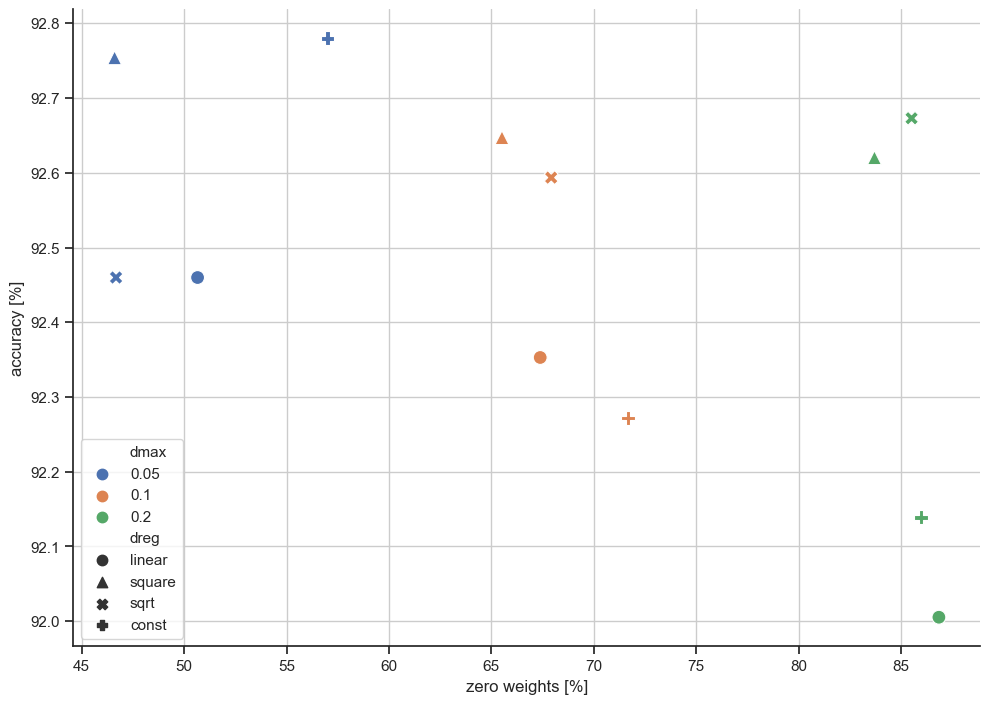

In [71]:
g = sns.scatterplot(df, x="zero", y="acc", hue="dmax", style="dreg", markers=['o', '^', 'X', 'P'], s=100)
g.legend(markerscale=1.25)
plt.xlabel("zero weights [%]")
plt.ylabel("accuracy [%]")
plt.grid()

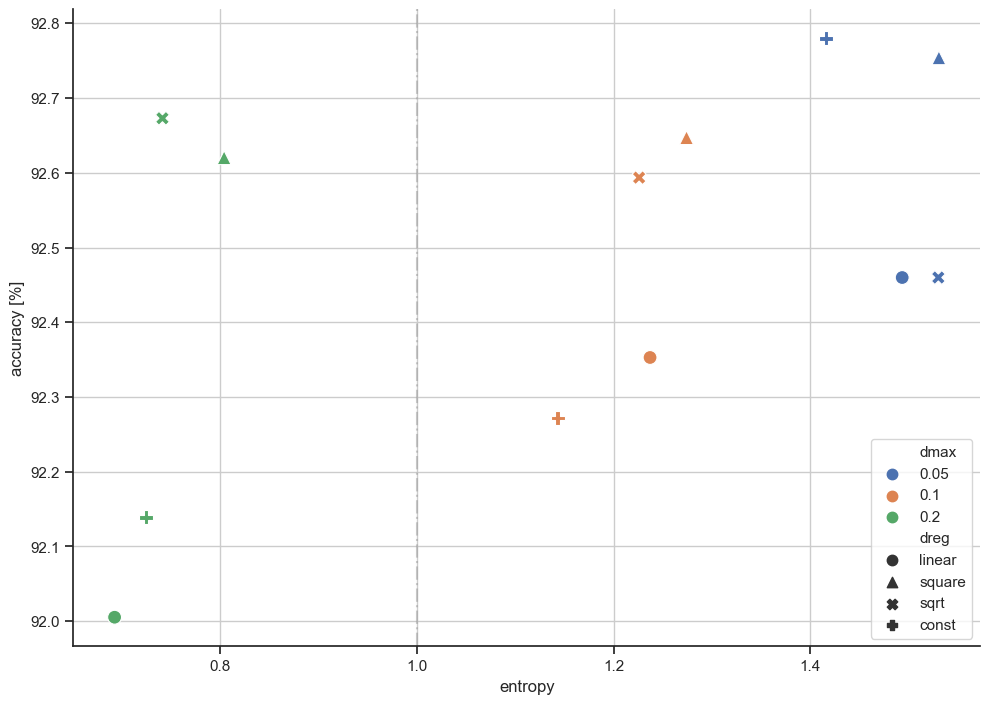

In [73]:
def zero_to_entropy(z: float) -> float:
    z /= 100
    not_z = (1 - z) / 2
    return -2*not_z*log2(not_z) - z*log2(z) 

df['entropy'] = df['zero'].map(zero_to_entropy)

g = sns.scatterplot(df, x="entropy", y="acc", hue="dmax", style="dreg", markers=['o', '^', 'X', 'P'], s=100)
g.legend(markerscale=1.25)
plt.xlabel("entropy")
plt.ylabel("accuracy [%]")
plt.axvline(1, 0, 100, alpha=0.5, c='#999', linestyle='-.')
plt.grid()